# Churn Prediction and Prevention

> First, let's load and inspect the dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = './Telecom_merged.csv'
df = pd.read_csv(file_path)

df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


The dataset has been successfully loaded and contains 38 columns, including customer demographics, service details, and churn information. Key columns include 'Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Internet Service', 'Monthly Charge', 'Total Charges', 'Customer Status', 'Churn Category', and 'Churn Reason'.

> Let's analyze the key factors contributing to customer churn and propose retention strategies based on the analysis.

The following are columns with missing values

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Offer                                3877
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Churn Category                       5174
Churn Reason                         5174
dtype: int64

In [5]:
# Drop columns with a high number of missing values or irrelevant columns
columns_to_drop = ['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Reason']
df_cleaned = df.drop(columns=columns_to_drop)

# Fill missing values in categorical columns with the mode and numerical columns with the median
df_cleaned = df_cleaned.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x.fillna(x.median()))

# Encode categorical variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

df_encoded.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Customer Status_Joined,Customer Status_Stayed,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Other,Churn Category_Price
0,37,0,2,9,42.39,16.0,65.6,593.30,0.00,0,...,False,True,True,False,False,True,True,False,False,False
1,46,0,0,9,10.69,10.0,-4.0,542.40,38.33,10,...,False,False,True,False,False,True,True,False,False,False
2,50,0,0,4,33.65,30.0,73.9,280.85,0.00,0,...,False,True,False,False,False,False,True,False,False,False
3,78,0,1,13,27.82,4.0,98.0,1237.85,0.00,0,...,False,True,False,False,False,False,False,True,False,False
4,75,0,3,3,7.38,11.0,83.9,267.40,0.00,0,...,False,True,True,False,False,False,False,True,False,False


> Random Forest Classifier

In [7]:
# Necessary imports were missing for the code
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Redefine the target variable and features correctly
X = df_encoded.drop(['Customer Status_Stayed'], axis=1)
y = df_encoded['Customer Status_Stayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix, class_report

(array([[ 585,  119],
        [  19, 1390]]),
 '              precision    recall  f1-score   support\n\n       False       0.97      0.83      0.89       704\n        True       0.92      0.99      0.95      1409\n\n    accuracy                           0.93      2113\n   macro avg       0.94      0.91      0.92      2113\nweighted avg       0.94      0.93      0.93      2113\n')

The RandomForestClassifier model achieved an accuracy of 93% on the test set. Here are the detailed evaluation metrics:


Confusion Matrix:
True Negatives: 585
False Positives: 119
False Negatives: 19
True Positives: 1390


Classification Report:
Precision: 0.97 (False), 0.92 (True)
Recall: 0.83 (False), 0.99 (True)
F1-Score: 0.89 (False), 0.95 (True)

> Churn rate

In [10]:
# Calculate churn rate
churn_rate = df['Customer Status'].value_counts(normalize=True)['Churned'] * 100
churn_rate

26.536987079369588

The churn rate is approximately 26.54%.

To calculate how long it will take for the business to run out of customers at the current churn rate, we can use the formula for exponential decay. The formula is:

\[ N(t) = N_0 \times (1 - r)^t \]

Where:
- \( N(t) \) is the number of customers at time \( t \)
- \( N_0 \) is the initial number of customers
- \( r \) is the churn rate (expressed as a decimal)
- \( t \) is the time period

We need to solve for \( t \) when \( N(t) \) approaches 0. However, since the number of customers can't be exactly 0 in a continuous model, we can solve for when the number of customers drops below 1.

Let's calculate this.

In [ ]:
import numpy as np

# Initial number of customers
N0 = len(df)

# Churn rate (as a decimal)
r = churn_rate / 100

# Solve for t when N(t) < 1
t = np.log(1 / N0) / np.log(1 - r)
t

At the current churn rate of approximately 26.54%, the business will run out of customers in about 28.73 months.

> Next, let's identify the key factors contributing to customer churn by analyzing the feature importances from the RandomForestClassifier model.

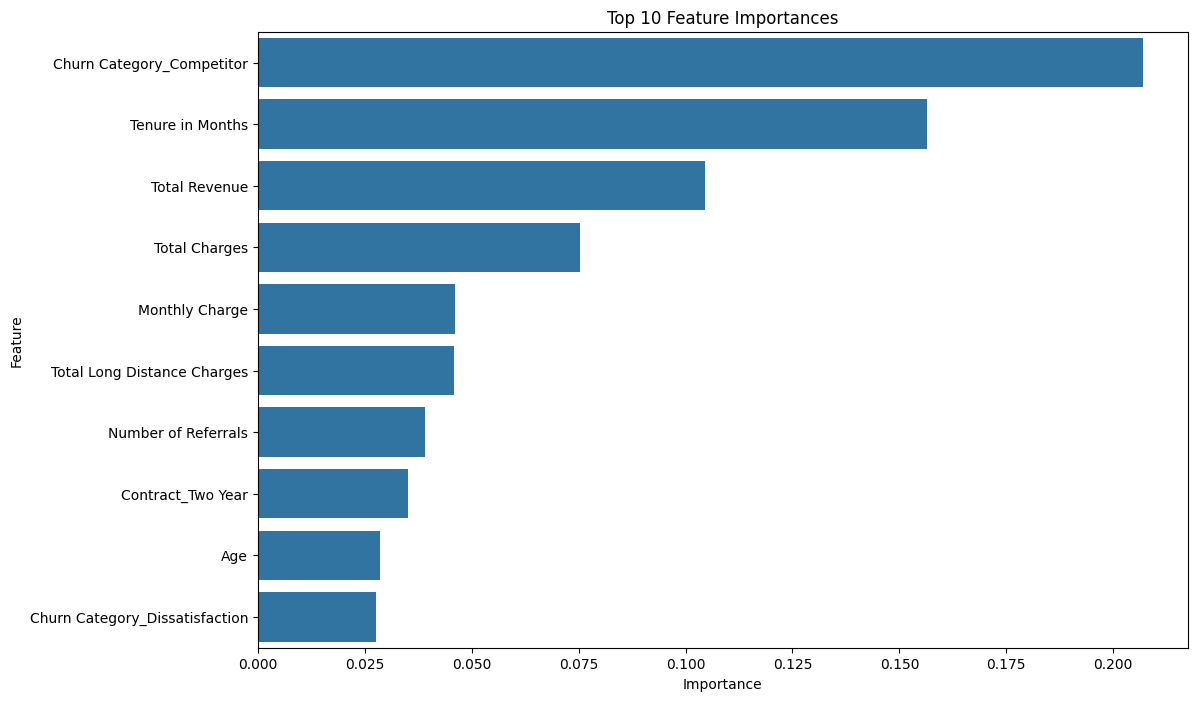

,Feature,Importance
37,Churn Category_Competitor,0.207070
3,Tenure in Months,0.156522
11,Total Revenue,0.104480
7,Total Charges,0.075305
6,Monthly Charge,0.046072
10,Total Long Distance Charges,0.045983
2,Number of Referrals,0.039012
32,Contract_Two Year,0.035217
0,Age,0.028501
38,Churn Category_Dissatisfaction,0.027720


In [8]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

feature_importances.head(10)

The top 10 features contributing to customer churn are:
Churn Category: Competitor
Tenure in Months
Total Revenue
Total Charges
Monthly Charge
Total Long Distance Charges
Number of Referrals
Contract: Two Year
Age
Churn Category: Dissatisfaction

/tmp/ipykernel_40/3842973282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='viridis')


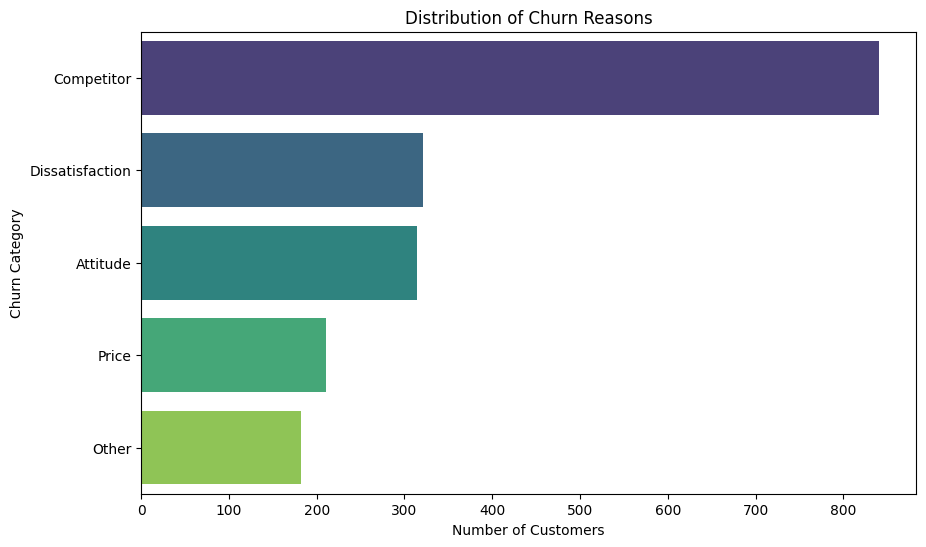

Churn Category
Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: count, dtype: int64

In [9]:
# Let's further analyze the churn reasons and their distribution
churn_reasons = df['Churn Category'].value_counts()

# Plot the churn reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='viridis')
plt.title('Distribution of Churn Reasons')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Category')
plt.show()

churn_reasons

The distribution of churn reasons is as follows:
Competitor: 841 customers
Dissatisfaction: 321 customers
Attitude: 314 customers
Price: 211 customers
Other: 182 customers


Insights and Further Strategies
Competitor: This is the leading cause of churn. Focus on competitive analysis and improving your offerings to match or exceed those of competitors.
Dissatisfaction: Addressing customer dissatisfaction through improved customer service, quality of service, and proactive issue resolution can help retain customers.
Attitude: Training customer service representatives to handle customer interactions more effectively and empathetically can reduce churn due to attitude issues.
Price: Offering flexible pricing plans, discounts, and value-added services can help retain price-sensitive customers.
Other: Investigate the specific reasons in the 'Other' category to identify any additional areas for improvement.

> Retention Strategies

Based on the analysis, here are some retention strategies:
Address Competitor Offers: Since 'Churn Category: Competitor' is the most significant factor, analyze competitor offers and try to match or exceed them. Offer competitive pricing, better devices, or additional services.
Increase Customer Tenure: Implement loyalty programs that reward long-term customers. Offer discounts or exclusive benefits to customers who stay longer.
Revenue-Based Incentives: For high-revenue customers, provide personalized offers and premium support to ensure they feel valued.
Manage Monthly Charges: Ensure that the pricing is transparent and competitive. Offer flexible payment plans or discounts for bundled services.
Improve Long Distance Services: Since 'Total Long Distance Charges' is a significant factor, consider offering better rates or packages for long-distance calls.
Referral Programs: Encourage existing customers to refer new customers by offering incentives for successful referrals.
Contract Flexibility: Provide flexible contract options, including month-to-month plans, to cater to different customer needs.
Address Dissatisfaction: Regularly collect customer feedback to identify and address dissatisfaction promptly. Provide excellent customer service and support to resolve issues quickly.